<a href="https://colab.research.google.com/github/infirnohamza/Classification-of-Fashion-MNIST-/blob/main/Adam_Hamza_Project_Fashion_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

%matplotlib inline
sns.set_style("whitegrid")


In [ ]:
# DataFrame for train and test
fashion_train_df = pd.read_csv('/content/sample_data/Fashionmnist/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('/content/sample_data/Fashionmnist/fashion-mnist_test.csv', sep = ',')

In [ ]:
# Head of the training dataset
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Tail elements in the training dataset
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Head of the testing dataset
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Tail elements in the testing dataset
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [ ]:
fashion_train_df.shape

(60000, 785)

In [ ]:
# Create training and testing arrays
train = np.array(fashion_train_df, dtype='float32')
test = np.array(fashion_test_df, dtype='float32')

In [ ]:
train.shape

(60000, 785)

In [ ]:
train

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Text(0.5, 1.0, 'Ankle boot')

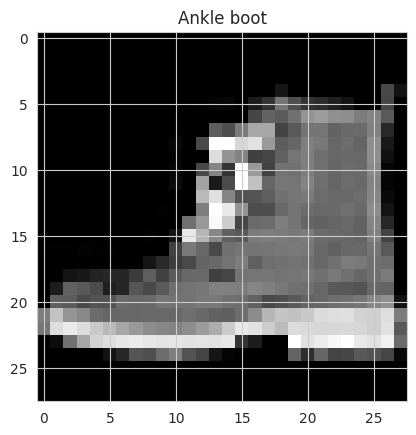

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Images in Dataset
i = random.randint(1,60000)
plt.imshow(train[i,1:].reshape((28,28)))

plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray')
label_index = fashion_train_df["label"][i]
plt.title(f"{class_names[label_index]}")

# 0  T-shirt/top
# 1  Trouser
# 2  Pullover
# 3  Dress
# 4  Coat
# 5  Sandal
# 6  Shirt
# 7  Sneaker
# 8  Bag
# 9  Ankle boot

In [ ]:
label = train[i,0]
label

9.0

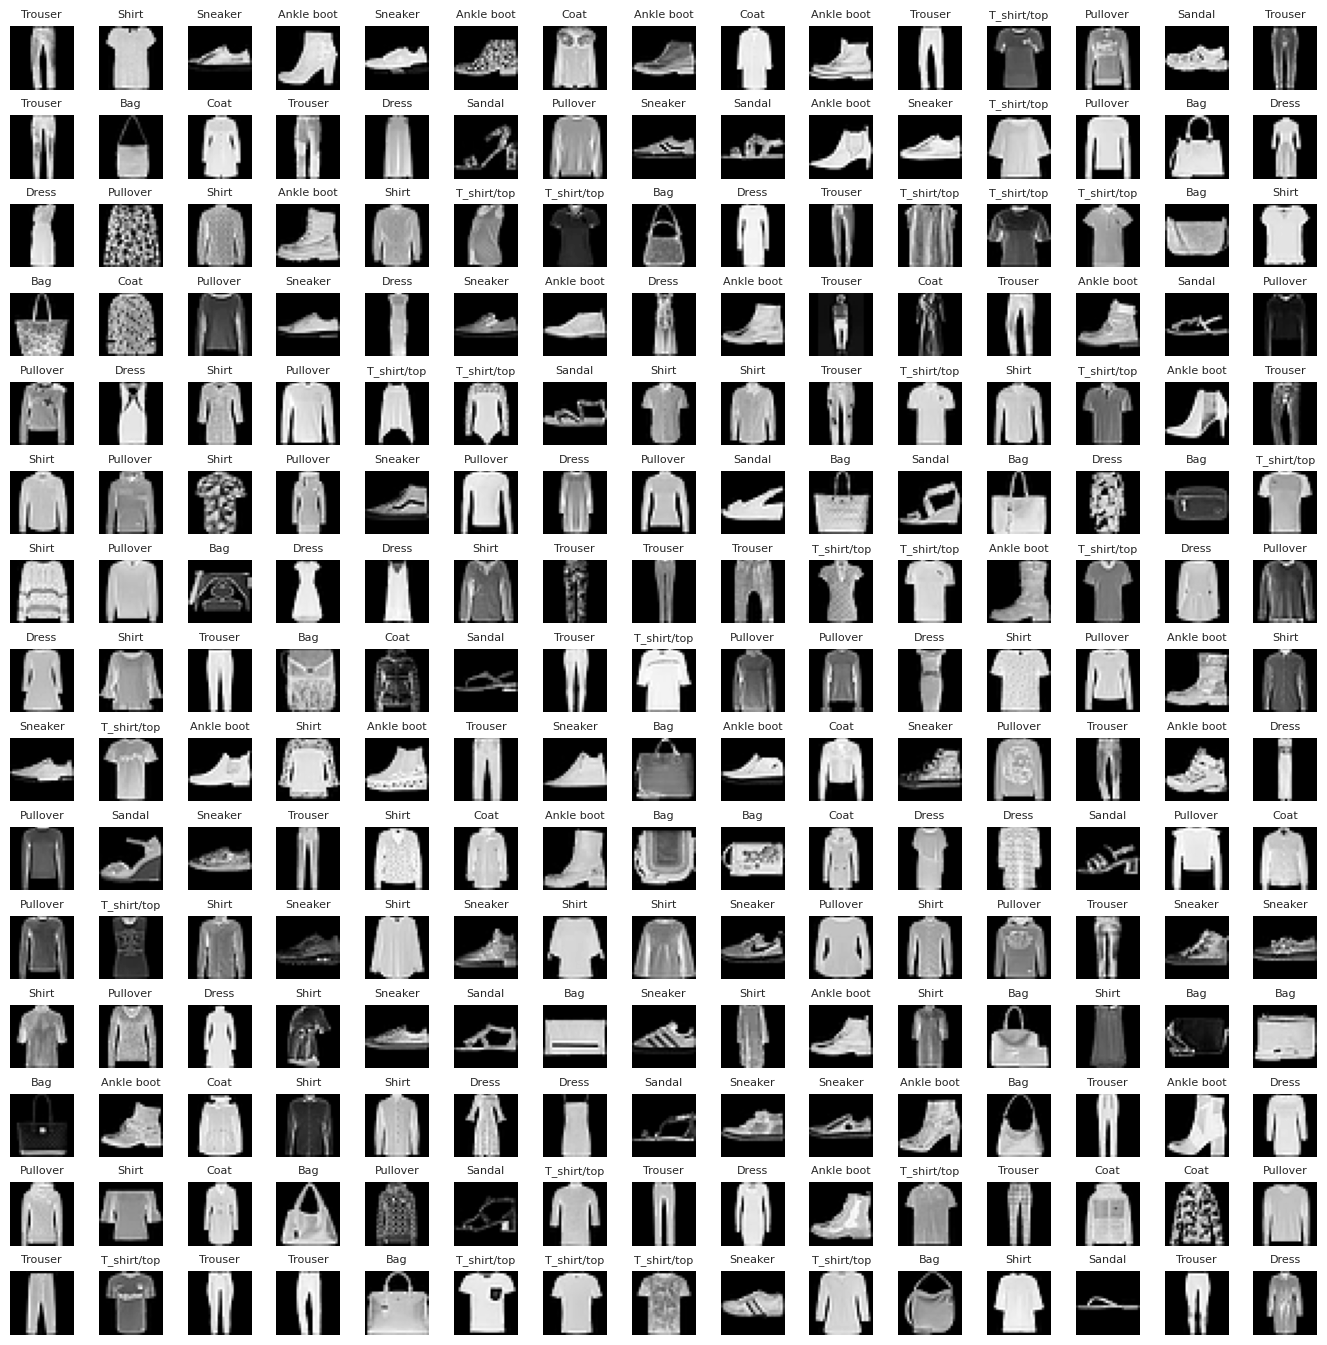

In [ ]:
# View images in a grid format

W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid):

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow( train[index,1:].reshape((28,28)),cmap='gray')
    label_index = int(train[index,0])
    axes[i].set_title(class_names[label_index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)



In [ ]:
# Prepare the training and testing dataset
X_train = train[:, 1:] / 255
y_train = train[:, 0]

X_test = test[:, 1:] / 255
y_test = test[:,0]

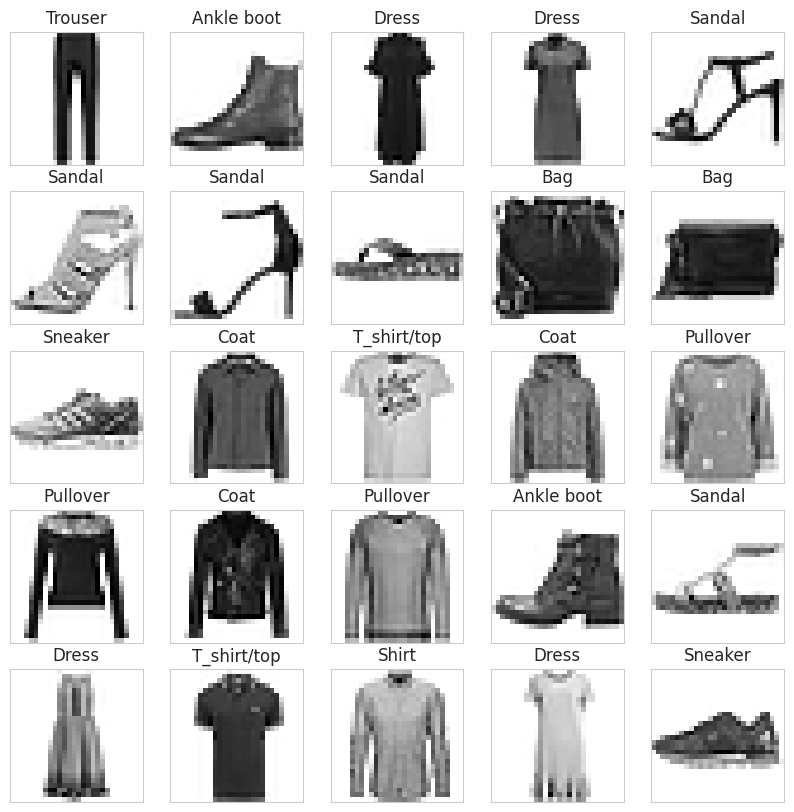

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 10))
num_images = 25
random_indices = random.sample(range(len(X_train)), num_images)

for idx, random_index in enumerate(random_indices):
    plt.subplot(5, 5, idx + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[random_index].reshape((28, 28)), cmap=plt.cm.binary)
    label_index = int(y_train[random_index])
    plt.title(class_names[label_index])
plt.show()
plt.tight_layout()

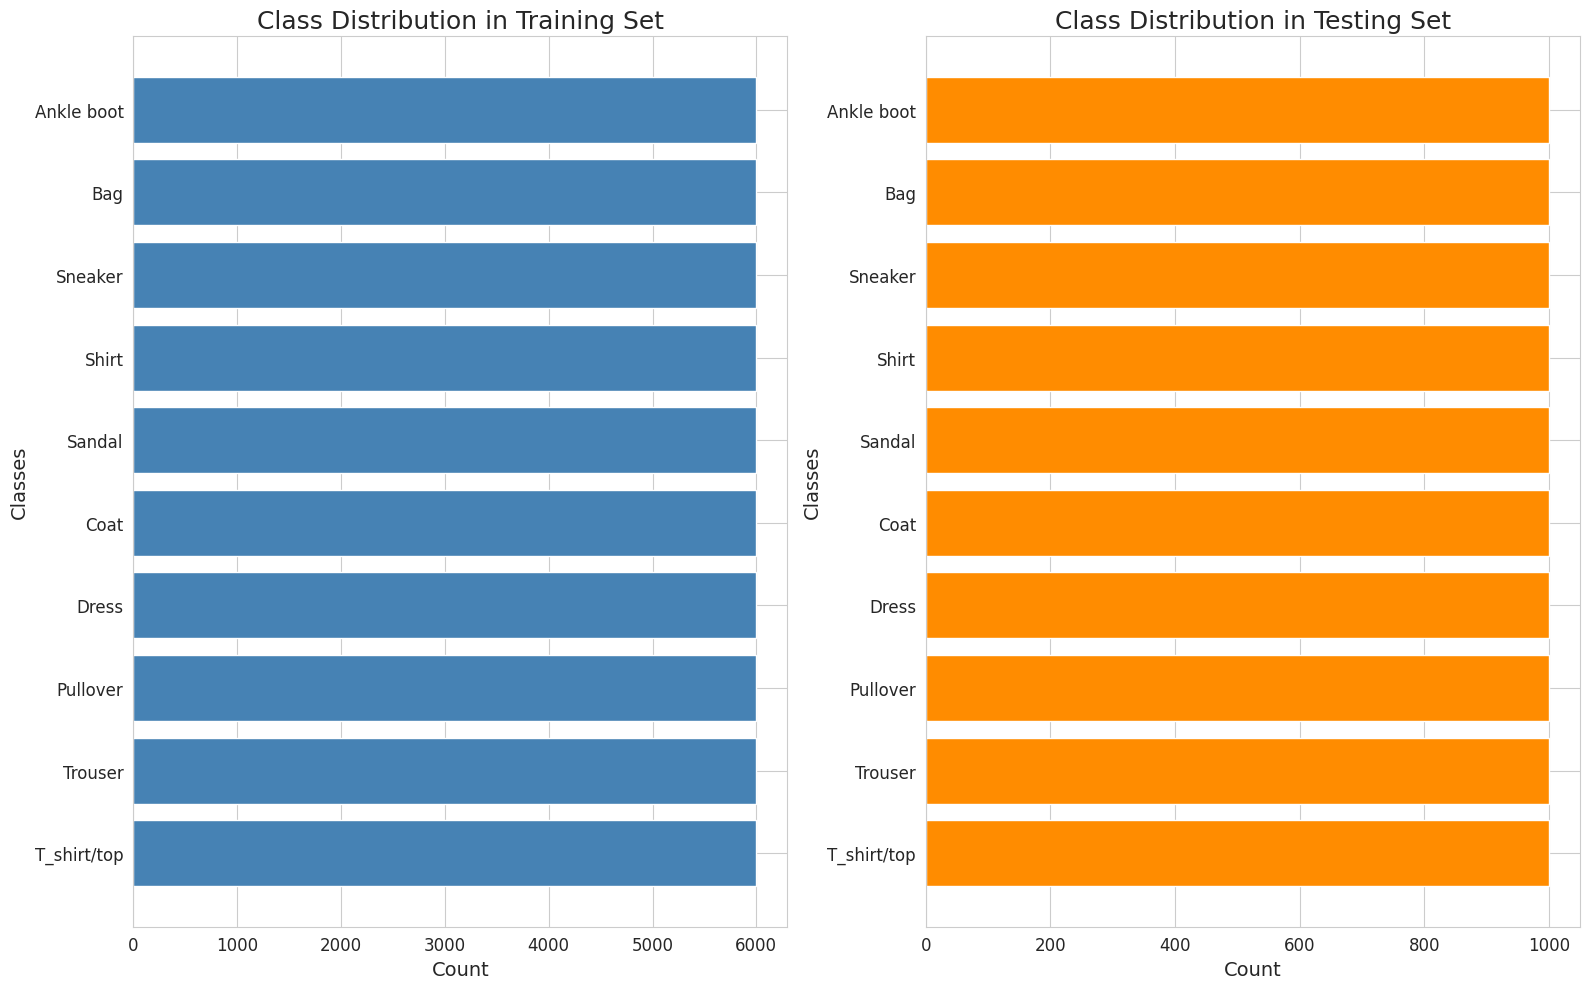

In [ ]:
plt.figure(figsize=(16, 10))

plt.subplot(1, 2, 1)
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(class_names, counts, color='steelblue')
plt.title('Class Distribution in Training Set', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Classes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1, 2, 2)
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(class_names, counts, color='darkorange')
plt.title('Class Distribution in Testing Set', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Classes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(48000, 784)
(48000,)


In [ ]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], * (28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], * (28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], * (28, 28, 1))

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)
(12000,)


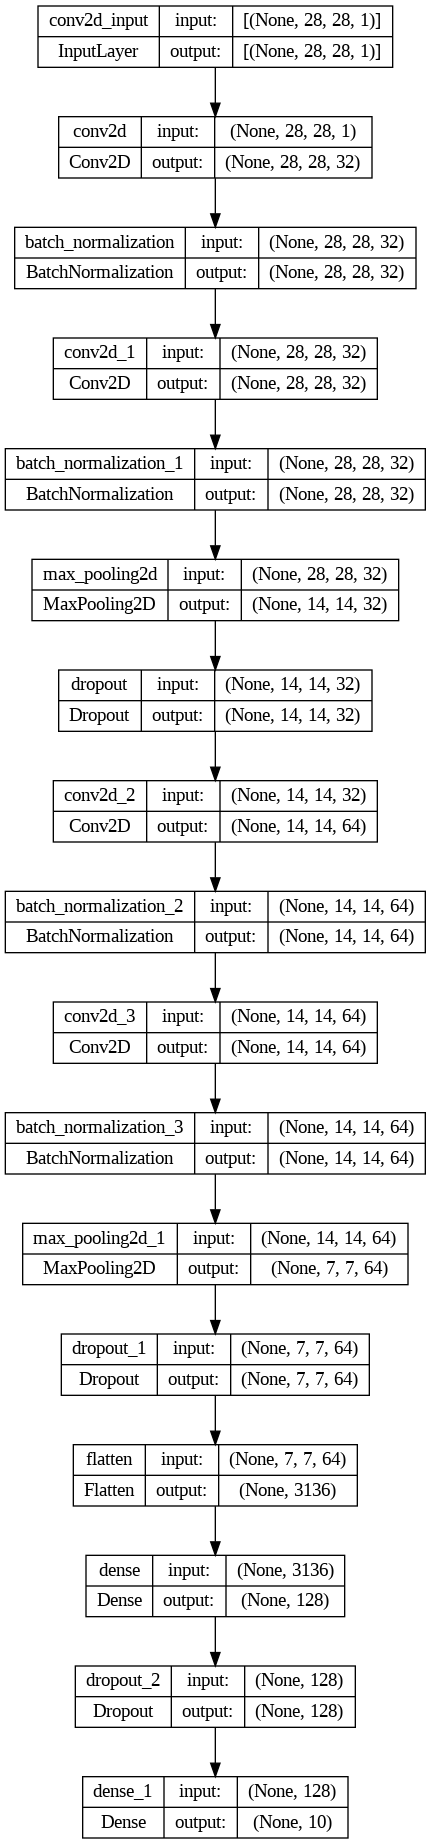

In [ ]:
cnn_model = Sequential()

# Model Parameters
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))


cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units=10, activation='softmax'))

# Plot the model workflow
from keras.utils import plot_model
plot_model(cnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the image
from IPython.display import Image
Image(filename='model_plot.png')

In [ ]:
#model metrics
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [ ]:
#training
epochs = 50
batch_size = 512

history = cnn_model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_validate, y_validate)
)

Epoch 1/50
94/94 [==============================] - 269s 3s/step - loss: 0.6627 - accuracy: 0.7764 - val_loss: 4.0071 - val_accuracy: 0.1027
Epoch 2/50
94/94 [==============================] - 269s 3s/step - loss: 0.3573 - accuracy: 0.8697 - val_loss: 2.9678 - val_accuracy: 0.2517
Epoch 3/50
94/94 [==============================] - 271s 3s/step - loss: 0.2987 - accuracy: 0.8899 - val_loss: 3.1975 - val_accuracy: 0.2542
Epoch 4/50
94/94 [==============================] - 274s 3s/step - loss: 0.2675 - accuracy: 0.9015 - val_loss: 2.1289 - val_accuracy: 0.4488
Epoch 5/50
94/94 [==============================] - 274s 3s/step - loss: 0.2396 - accuracy: 0.9117 - val_loss: 1.8354 - val_accuracy: 0.5175
Epoch 6/50
94/94 [==============================] - 272s 3s/step - loss: 0.2204 - accuracy: 0.9171 - val_loss: 0.4751 - val_accuracy: 0.8319
Epoch 7/50
94/94 [==============================] - 271s 3s/step - loss: 0.2032 - accuracy: 0.9242 - val_loss: 0.2340 - val_accuracy: 0.9176
Epoch 8/50
94

Text(0.5, 1.0, 'Accuracy evolution')

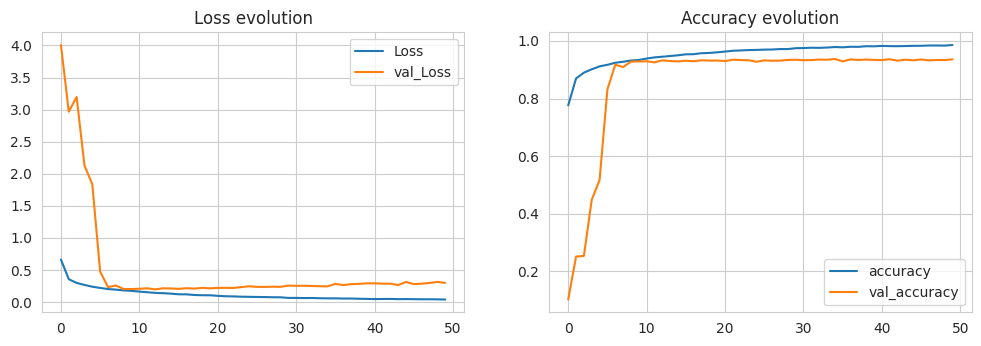

In [ ]:
#Plot metrics
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

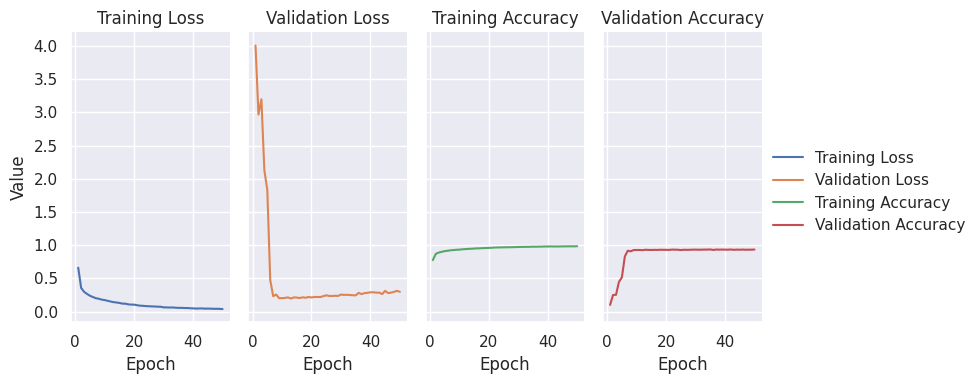

In [ ]:
import seaborn as sns
import pandas as pd

#Plot using seaboorn
history_df = pd.DataFrame({
    'Epoch': list(range(1, len(history.history['loss']) + 1)),
    'Training Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss'],
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy']
})


melted_history_df = history_df.melt(id_vars='Epoch')


sns.set_theme()


g = sns.FacetGrid(melted_history_df, col="variable", hue="variable", legend_out=True, height=4, aspect=0.5)
g.map_dataframe(sns.lineplot, x="Epoch", y="value")


g.set_titles(col_template="{col_name}")
g.set_axis_labels("Epoch", "Value")
g.add_legend(title="")


plt.show()


In [ ]:
!pip install tf-keras-vis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
#Test accuracy
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 [==============================] - 13s 40ms/step - loss: 0.2707 - accuracy: 0.9385
Test Accuracy : 0.938


In [ ]:
# get the predictions for the test data
predicted_classes = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

313/313 [==============================] - 13s 40ms/step


In [ ]:
test_img = X_test[0]
prediction = cnn_model.predict(X_test)
prediction[0]

313/313 [==============================] - 13s 40ms/step


array([9.9999994e-01, 2.6910616e-17, 3.6974837e-13, 8.0467029e-11,
       6.2028163e-17, 2.5720488e-21, 5.5144649e-11, 6.0527230e-19,
       7.1944909e-16, 8.4363521e-21], dtype=float32)

In [ ]:
np.argmax(prediction[0])

0

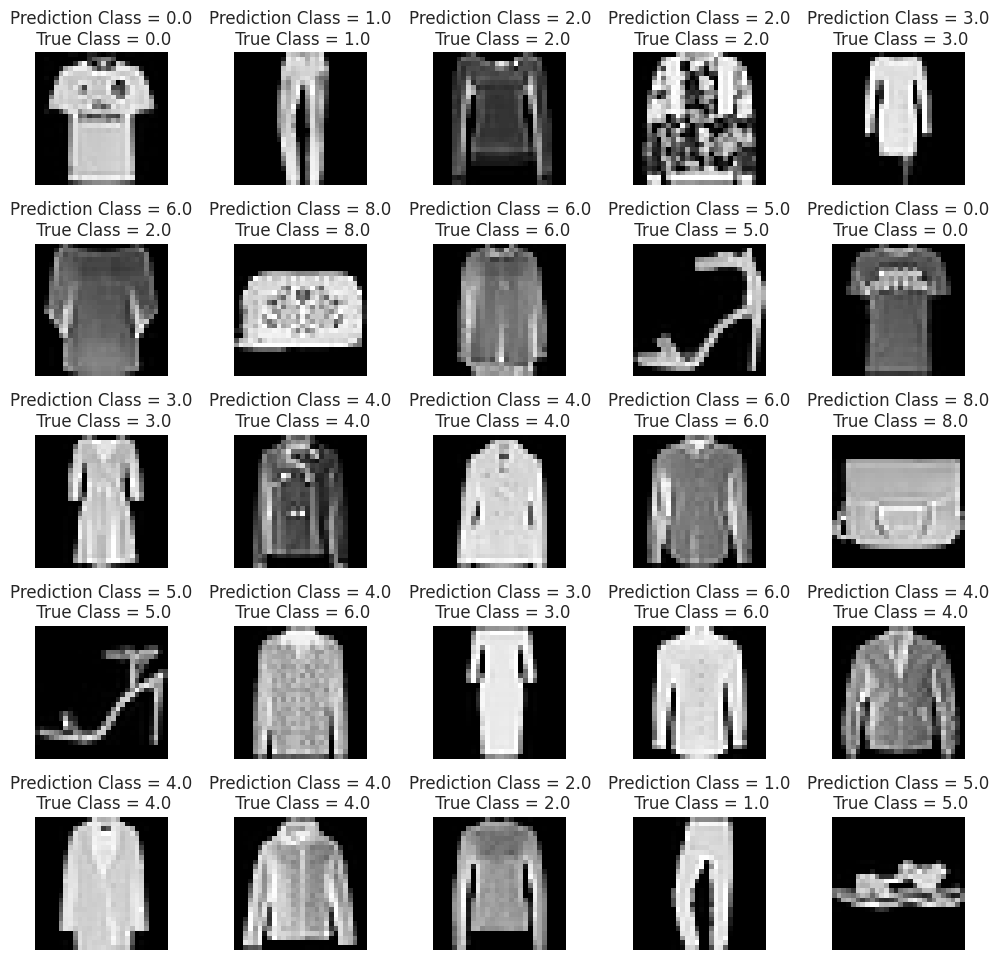

In [ ]:
#plot Predicted classes
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Prediction Class = {(predicted_classes[i]):0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


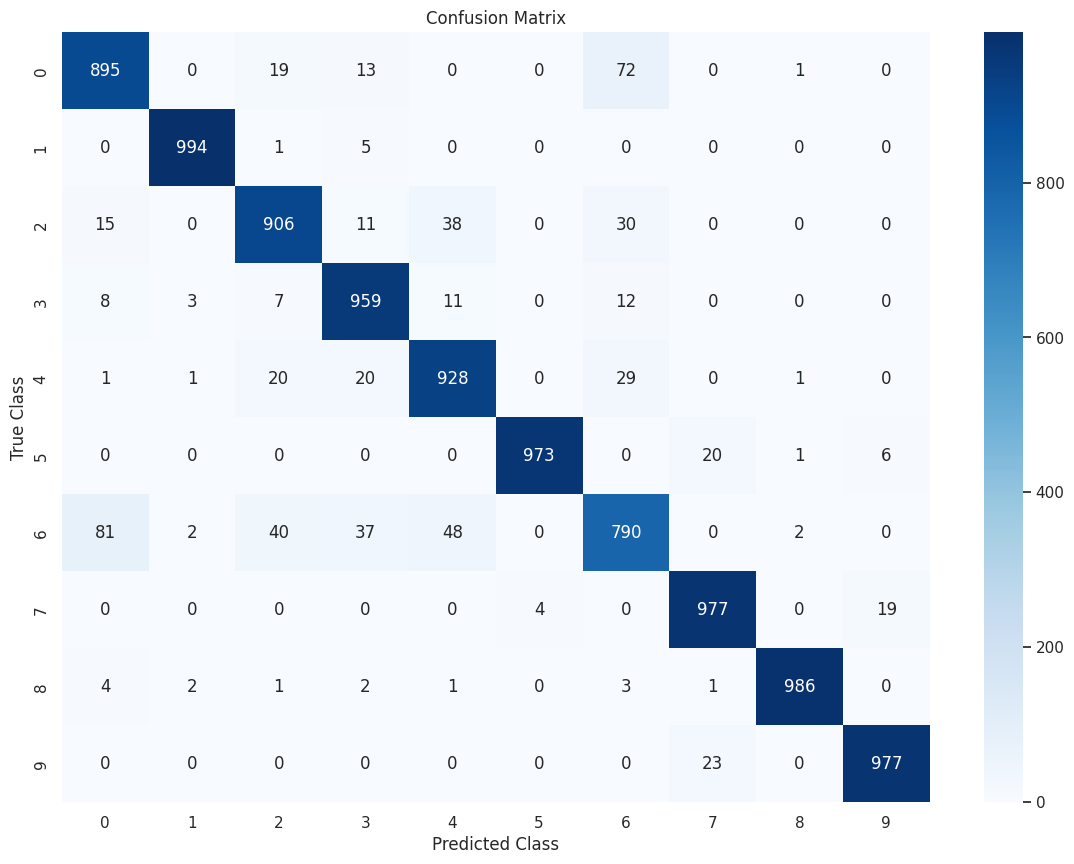

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(np.arange(0.5, 10.5), np.arange(0, 10))
plt.yticks(np.arange(0.5, 10.5), np.arange(0, 10))
plt.title('Confusion Matrix')

plt.show()



In [ ]:
#F1 score
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.89      0.90      0.89      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.91      0.91      0.91      1000
     Class 3       0.92      0.96      0.94      1000
     Class 4       0.90      0.93      0.92      1000
     Class 5       1.00      0.97      0.98      1000
     Class 6       0.84      0.79      0.82      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.98      0.98      0.98      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

